In [4]:
import creds
import riotwatcher as rtw
import pandas as pd
import numpy as np
import mylibraries as my
import matplotlib.pyplot as plt
import time

Make connection to API

In [5]:
connection = rtw.LolWatcher(creds.riot_API_Key)


Obtener jugador

In [6]:
Nombre_jugador = input("Ingresa tu nombre de usuario: ")
print("Elige tu region")
regiones = {1:"BR1",2:"EUNE1",3:"EUW1",4:"JP1",5:"KR",6:"LA1",7:"LA2",8:"NA1",9:"OC1",10:"TR1",11:"RU",12:"PH2",13:"SG2",14:"TH2",15:"TW2",16:"VN2"}

for region in regiones:
    print(region," ",regiones[region])

while(True):
    region = int(input())
    if region < 1 or region > 16:
        print("Region no reconocida, intenta de nuevo")
    else:
        break

region = regiones[region]
try:
    jugador = connection.summoner.by_name(region = region, summoner_name=Nombre_jugador)
    print("Jugador encontrado!")
except:
    print("Jugador no encontrado")

Elige tu region
1   BR1
2   EUNE1
3   EUW1
4   JP1
5   KR
6   LA1
7   LA2
8   NA1
9   OC1
10   TR1
11   RU
12   PH2
13   SG2
14   TH2
15   TW2
16   VN2
Jugador encontrado!


# Mejores campeones

In [7]:
Maestrias = connection.champion_mastery.by_summoner(region=region,encrypted_summoner_id=jugador["id"])
campeones = my.GetChampsNamesAndMasteries(Maestrias)

Maestria = pd.DataFrame(campeones, columns=["Campeon","Puntos de maestria","Tipo"])
Maestria.to_csv("Jugadores/"+Nombre_jugador+".csv",index=False)
Maestria


,Campeon,Puntos de maestria,Tipo
0,MonkeyKing,45912,"[Fighter, Tank]"
1,JarvanIV,41075,"[Tank, Fighter]"
2,Poppy,35508,"[Tank, Fighter]"
3,Sejuani,30602,"[Tank, Fighter]"
4,Vi,27485,"[Fighter, Assassin]"
...,...,...,...
67,Ezreal,159,"[Marksman, Mage]"
68,MissFortune,143,[Marksman]
69,Tryndamere,135,"[Fighter, Assassin]"
70,Sona,133,"[Support, Mage]"


#### Grafica de maestrias

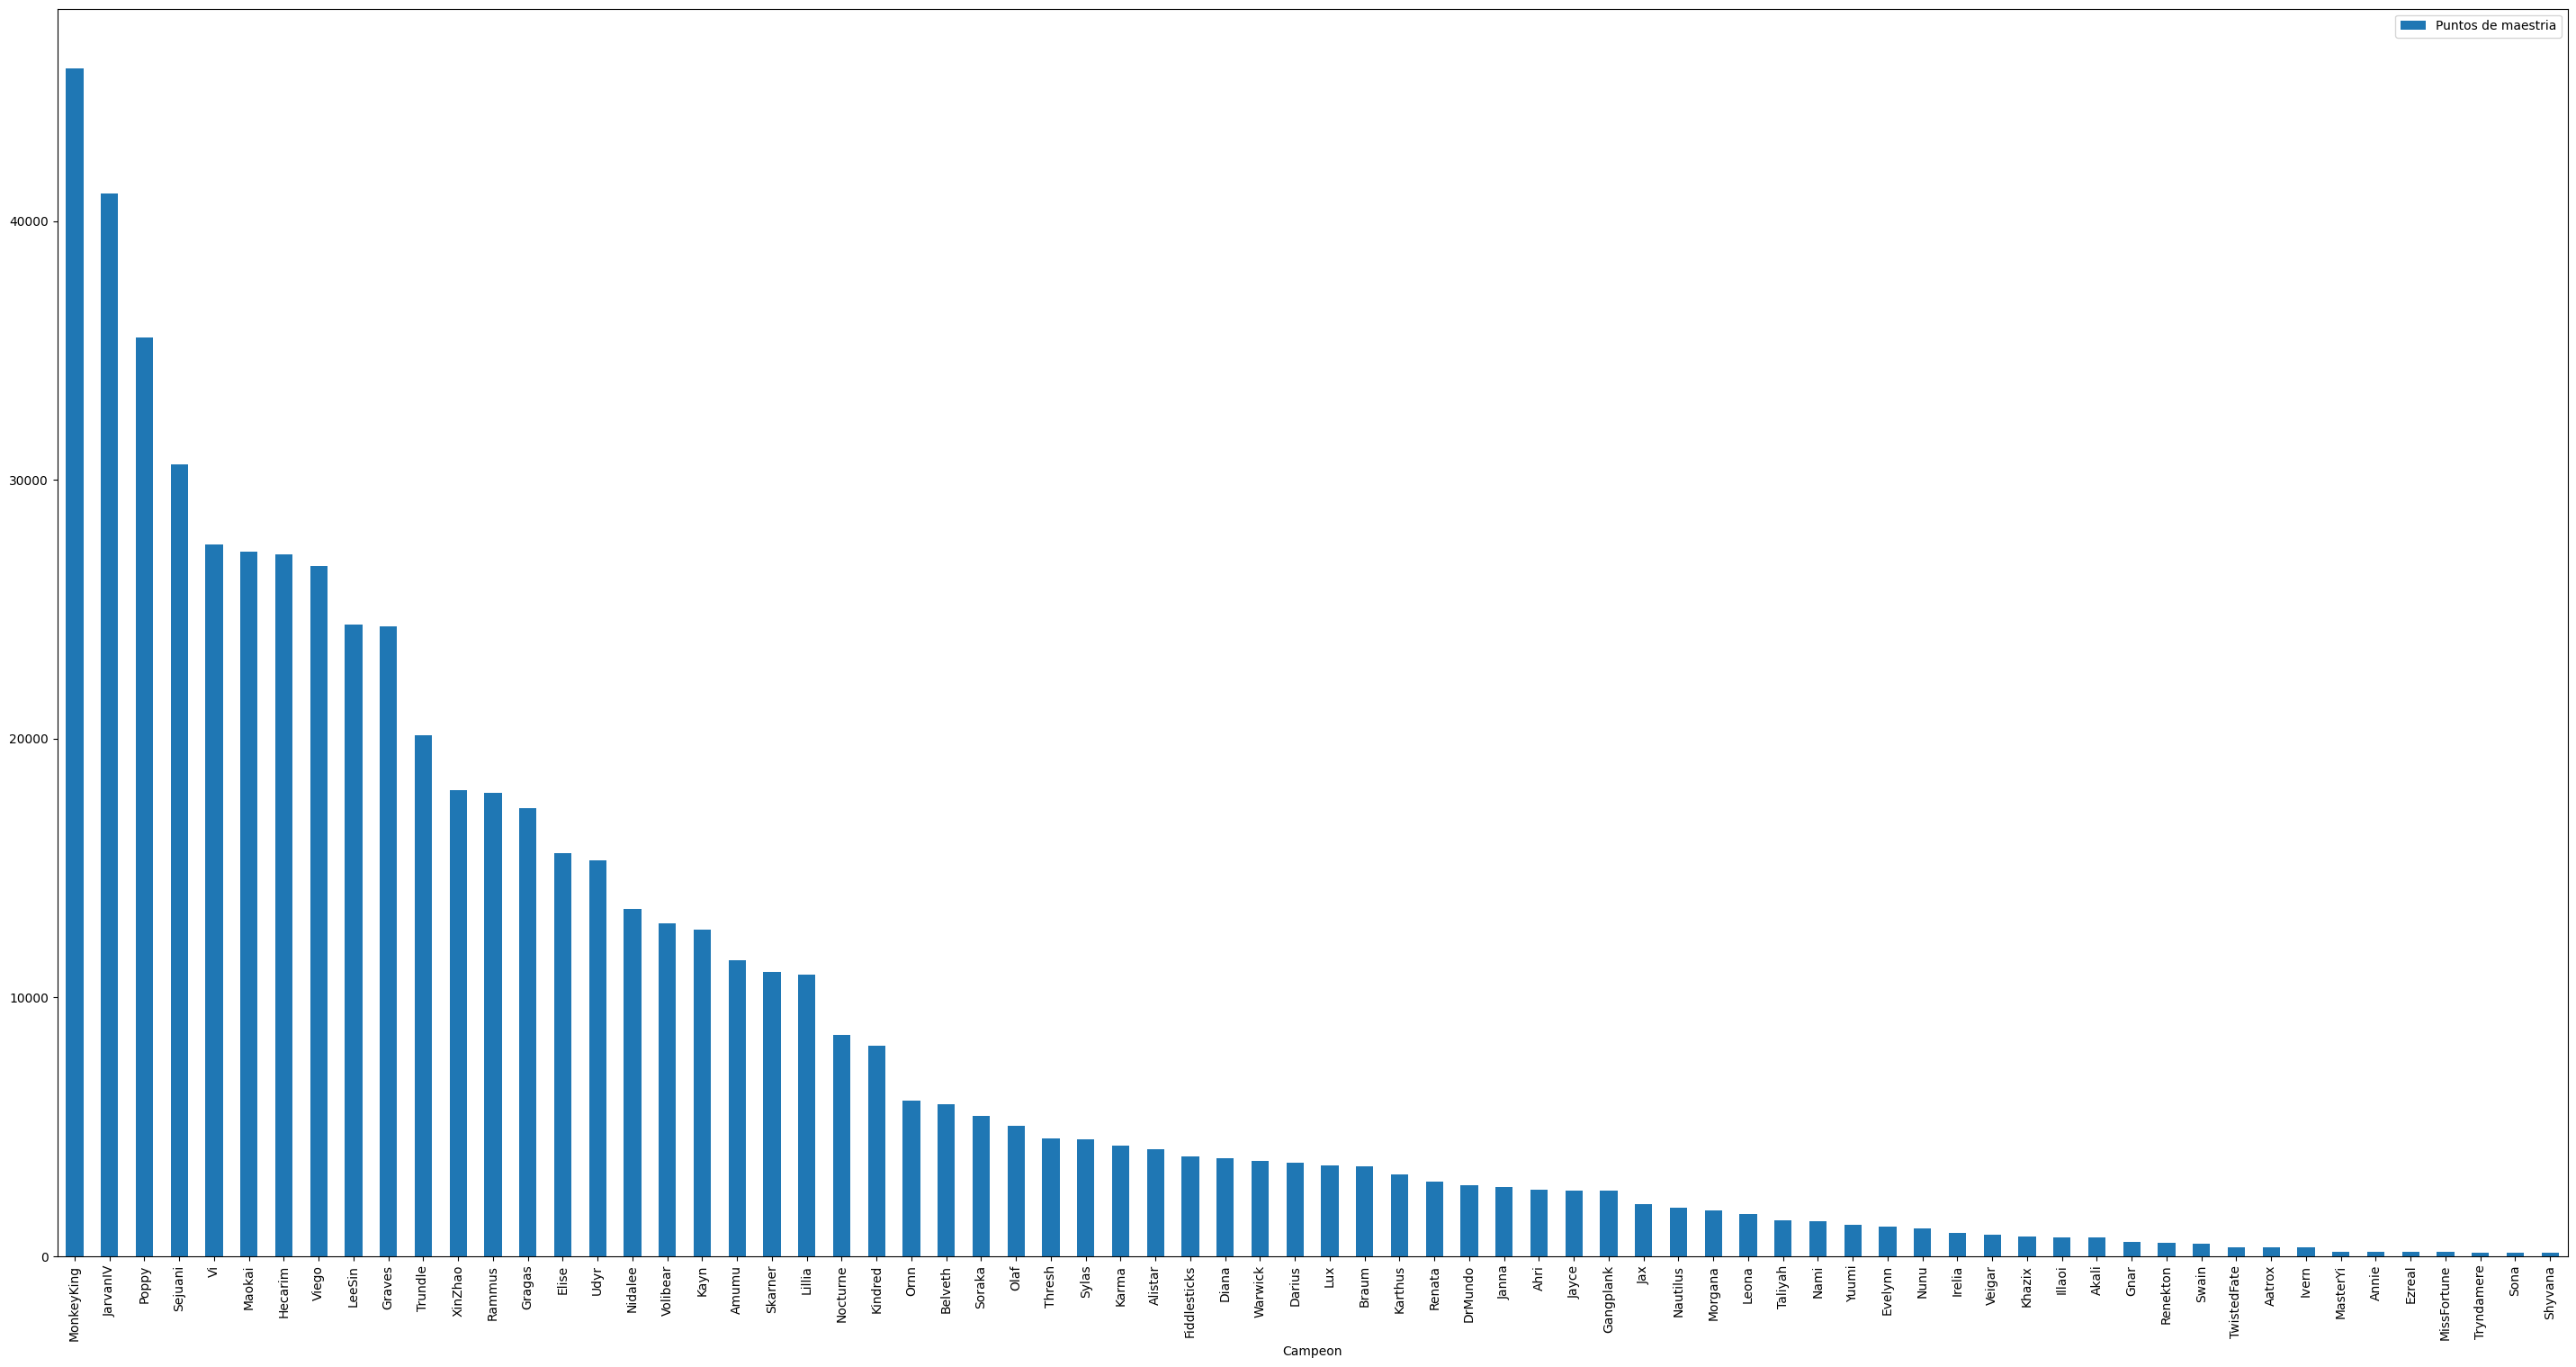

In [8]:
size = len(Maestria)/2
Maestria.plot.bar(x = "Campeon", y = "Puntos de maestria", figsize = (size,size/2))
plt.show()

# Partidas

In [9]:
partidas = connection.match
partidas_solo = my.getMatchList(puuid=jugador["puuid"], cantidadPartidas= 300,queque=420)
partidas_flex = my.getMatchList(puuid=jugador["puuid"],cantidadPartidas=300,queque=440)

In [10]:
full_partidas = partidas_solo
for partida in partidas_flex:
    full_partidas.append(partida)

In [12]:
dict_info = {}
delay = 0
for partida in full_partidas:
    delay += 1
    if delay > 95:
        time.sleep(120)
        delay = 0
    info = my.GetMatchInfo(region=region,match_id=partida)
    participantes = info["info"]["participants"]
    i = 0
    for player in participantes:
        if(player["puuid"] == jugador["puuid"]):
            break
        else:
            i += 1

    campeon = participantes[i]["championName"]
    damage = participantes[i]["totalDamageDealtToChampions"]
    vision = participantes[i]["visionScore"]
    cs = participantes[i]["totalMinionsKilled"]
    kills = participantes[i]["kills"]
    deaths = participantes[i]["deaths"]
    assists = participantes[i]["assists"]
    stats = [1,damage,vision,cs,kills,deaths,assists]

    if campeon in dict_info:
        dict_info[campeon][0] += stats[0]
        partidas_jugadas = dict_info[campeon][0]
        i = 1
        while(i < len(dict_info[campeon])):
            dict_info[campeon][i] = (dict_info[campeon][i]+stats[i])/partidas_jugadas
            i += 1
    else:
        dict_info[campeon] = stats

dict_info



{'MonkeyKing': [36,
  315.43235014317554,
  0.9449120641721159,
  0.5996829814054752,
  0.14528717669609856,
  0.08898235229437261,
  0.4001700901272859],
 'Sylas': [6,
  1649.6277777777777,
  3.6861111111111113,
  2.6222222222222222,
  1.2722222222222221,
  0.4444444444444445,
  0.7027777777777778],
 'XinZhao': [21,
  1103.175965303441,
  1.9454221080785312,
  1.502108606541474,
  0.3977826278734143,
  0.6701951369106042,
  0.6884980327580088],
 'Trundle': [9,
  5088.253317901235,
  4.459253747795414,
  8.773578042328042,
  1.7409336419753088,
  0.9480213844797178,
  3.3822145061728395],
 'Kindred': [6,
  4498.019444444445,
  11.055555555555555,
  10.147222222222222,
  1.3333333333333333,
  0.6416666666666667,
  1.513888888888889],
 'Gragas': [33,
  377.3286278094567,
  0.9071766806459864,
  1.1701499476154797,
  0.12416216503223455,
  0.12708337751297846,
  0.18950645287645812],
 'Hecarim': [27,
  427.57280668291713,
  1.4566636256295151,
  1.6478417457423231,
  0.1897512438628825,
 

In [13]:
dataframe = pd.DataFrame(dict_info)
columns = ["Veces jugadas","DMG/partida","Vision/partida","cs/partida","kill/partida","deaths/partida","assists/partida"]
dataframe = dataframe.T
dataframe.columns = columns
dataframe

,Veces jugadas,DMG/partida,Vision/partida,cs/partida,kill/partida,deaths/partida,assists/partida
MonkeyKing,36.0,315.432350,0.944912,0.599683,0.145287,0.088982,0.400170
Sylas,6.0,1649.627778,3.686111,2.622222,1.272222,0.444444,0.702778
XinZhao,21.0,1103.175965,1.945422,1.502109,0.397783,0.670195,0.688498
Trundle,9.0,5088.253318,4.459254,8.773578,1.740934,0.948021,3.382215
Kindred,6.0,4498.019444,11.055556,10.147222,1.333333,0.641667,1.513889
Gragas,33.0,377.328628,0.907177,1.170150,0.124162,0.127083,0.189506
Hecarim,27.0,427.572807,1.456664,1.647842,0.189751,0.231126,0.191178
Graves,15.0,880.873663,3.447629,2.513748,0.287353,0.215520,0.503005
LeeSin,69.0,208.243136,0.515000,0.436775,0.118096,0.073110,0.191409
Vi,42.0,220.556859,0.631806,0.466195,0.076689,0.169629,0.168572


In [17]:
dict_info = {}
delay = 0
name = 0
for partida in full_partidas:
    delay += 1
    if delay > 95:
        time.sleep(120)
        delay = 0
    info = my.GetMatchInfo(region=region,match_id=partida)
    participantes = info["info"]["participants"]
    i = 0
    for player in participantes:
        if(player["puuid"] == jugador["puuid"]):
            break
        else:
            i += 1

    campeon = participantes[i]["championName"]
    if campeon != "MonkeyKing":
        continue
    damage = participantes[i]["totalDamageDealtToChampions"]
    vision = participantes[i]["visionScore"]
    cs = participantes[i]["totalMinionsKilled"]
    kills = participantes[i]["kills"]
    deaths = participantes[i]["deaths"]
    assists = participantes[i]["assists"]
    stats = [1,damage,vision,cs,kills,deaths,assists]

    dict_info[campeon+str(name)] = stats
    name += 1

dict_info

{'MonkeyKingL': [1, 10786, 33, 20, 5, 3, 14]}